# Data exploration

This section deals with the exploration of the dataset. First of all, the demographic data of the sample is described with regard to basic demographic variables. Second,the **macro- and microstructural** data is explored, comparing how the control and patient group might differ respectively. 

## 1. Demographic data

In the Dublin sample, there is a different subset of patients with **micro-structural (MD and FA)** data compared to those with **macro-structural (CT)** data. Both "subsets" are loaded and compared with regard to basic demographic variables.

### 1.1 Reading and adjusting the macro- and microstructural data

First, relevant modules are imported to read the data. Since different operating systems might differ in the way indicating file paths, the os.pardir() function is used to ensure that the code can run independently of various operating systems.

In [57]:
#import module to read data

import pandas as pd
import os

#store CT data in variable "CT_Dublin"

CT_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_thickness_Dublin.csv')
CT_Dublin = pd.read_csv(CT_Dublin_path)

To get the columns of our dataframe in order to see which variables are measured, we simply run the following command. 

In [58]:
CT_Dublin.columns

Index(['Subject ID', 'Age', 'Sex', 'Group', 'lh_bankssts_part1_thickness',
       'lh_bankssts_part2_thickness',
       'lh_caudalanteriorcingulate_part1_thickness',
       'lh_caudalmiddlefrontal_part1_thickness',
       'lh_caudalmiddlefrontal_part2_thickness',
       'lh_caudalmiddlefrontal_part3_thickness',
       ...
       'rh_supramarginal_part5_thickness', 'rh_supramarginal_part6_thickness',
       'rh_supramarginal_part7_thickness', 'rh_frontalpole_part1_thickness',
       'rh_temporalpole_part1_thickness',
       'rh_transversetemporal_part1_thickness', 'rh_insula_part1_thickness',
       'rh_insula_part2_thickness', 'rh_insula_part3_thickness',
       'rh_insula_part4_thickness'],
      dtype='object', length=312)

As we can see, besides the different brain regions there are columns that indicate variables containing the demographic data that we are interested in for now. To make things easier, we adjust the dataframe in selecting a subset that only carries the demographic variables.

In [59]:
#select a subset of the CT data with demographic variables

demographic_CT = CT_Dublin[["Subject ID", "Age", "Sex", "Group"]]

Having the subset of demographic information for the **macrostructural** data, the identical procedure is done for the **microstructural** data. So first, the data is read and adjusted to demographic variables only.

In [60]:
#read MD and FA data

MD_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_MD_cortexAv_mean_Dublin.csv')
MD_Dublin = pd.read_csv(MD_Dublin_path)

FA_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_FA_cortexAv_mean_Dublin.csv')
FA_Dublin = pd.read_csv(FA_Dublin_path)

In [61]:
#select a subset of the MD and FA data with demographic variables

demographic_MD = MD_Dublin[["Subject ID", "Age", "Sex", "Group"]]
demographic_FA = FA_Dublin[["Subject ID", "Age", "Sex", "Group"]]

Normally, the shape of the dataframes for each MRI metric should be the same since it is only one sample. However, to check this we can run the following commands. 

In [62]:
demographic_CT.shape, demographic_MD.shape, demographic_FA.shape

((108, 4), (115, 4), (115, 4))

As we can see, the shapes are not identicial except for the **MD** and **FA** dataframe. Since the latter are both central characteristics of diffusion tensors (see further below), it makes sense that they exhibit the identical shape and were measured for the same amount of subjects. However, for the **CT** data, it seems like there are fewer rows indicating not the same amount of subjects for whom the metric was measured. So having a look at the dataframes should show that.

In [63]:
print(demographic_CT, demographic_MD, demographic_FA)

    Subject ID  Age  Sex  Group
0      CON9225   21    2      1
1      CON9229   28    2      1
2      CON9231   29    2      1
3     GASP3037   61    1      2
4     GASP3040   47    1      2
..         ...  ...  ...    ...
103    RPG9019   31    1      2
104    RPG9102   42    2      2
105    RPG9119   41    1      2
106    RPG9121   51    1      2
107    RPG9126   56    1      2

[108 rows x 4 columns]     Subject ID  Age  Sex  Group
0      CON3140   37    2      1
1      CON3891   33    2      1
2      CON4664   40    2      1
3      CON7009   21    1      1
4      CON7024   59    1      1
..         ...  ...  ...    ...
110    RPG9102   42    2      2
111    RPG9103   37    1      2
112    RPG9119   41    1      2
113    RPG9121   51    1      2
114    RPG9126   56    1      2

[115 rows x 4 columns]     Subject ID  Age  Sex  Group
0      CON3140   37    2      1
1      CON3891   33    2      1
2      CON4664   40    2      1
3      CON7009   21    1      1
4      CON7024   59    1

To prove that the subjects in the **MD** and **FA** dataframe are identical, we can compare them and run the following code. The code implies whether the subjects in the **MD** dataframe are also in the **FA** dataframe and returns the amount of "True" cases for  being in both dataframes and "False" if that is not the case. So we expect the amount of "True" cases to be 115 since the 115 rows indicate the amount of subjects.

In [64]:
demographic_MD['Subject ID'].isin(demographic_FA['Subject ID']).value_counts() 

True    115
Name: Subject ID, dtype: int64

To double check, we can run the following:

In [65]:
demographic_MD['Subject ID'].equals(demographic_FA['Subject ID'])

True

The same can be done for the **CT** dataframe since it indicates 108 participants. It might be interesting to know in how far the participants overlap.

In [66]:
demographic_CT['Subject ID'].isin(demographic_MD['Subject ID']).value_counts() 

False    62
True     46
Name: Subject ID, dtype: int64

As the output shows, the participants in the **CT** and the **MD** and **FA** dataframe are not entirely identical. So both MRI metrics are not measured for the same participants. Subsequently, for the comparison of the demographical data both dataframes are going to be used.

### 1.2 Comparing demographic variables for the macro- and microstructural data

As already indicated above, the **macrostructural** data contains a total of N = 108 participants whereas the **microstructural** data was measured for a total of N = 115 participants. For n = 46 participants both MRI metrics were measured. 

Before comparing the demographic variables, first we will have a look at the amount of participants belongig to the control and patient group for both MRI metrics. The documentation on [figshare](https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550) provides label information for Group (1=control, 2=case). To make the following visualizations more self-explaining, the numbers indicating the group are replaced with the respective label.

In [122]:
#label group 1 as control and 2 as patient

demographic_CT['Group'] = demographic_CT['Group'].replace([1,2],['Control', 'Patient'])

/Users/mello/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Since the demographic variables in the **FA** and **MA** dataframes are the same, in the following the **FA** dataframe is used to display demographic variables.

In [123]:
#label group 1 as control and 2 as patient

demographic_FA['Group'] = demographic_FA['Group'].replace([1,2],['Control', 'Patient'])

/Users/mello/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


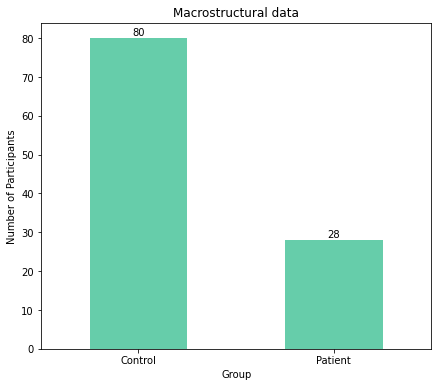

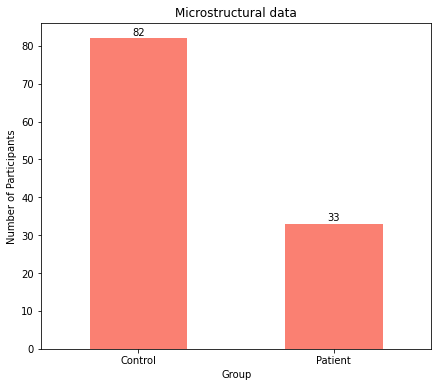

In [69]:
import matplotlib.pyplot as plt

Group_CT = demographic_CT['Group'].value_counts()
plt.figure(figsize=(7, 6))

ax = Group_CT.plot(kind='bar', rot=0, color="mediumaquamarine")
ax.set_title("Macrostructural data", y = 1)
ax.set_xlabel('Group')
ax.set_ylabel('Number of Participants')
ax.set_xticklabels(('Control', 'Patient'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    

Group_FA = demographic_FA['Group'].value_counts()
plt.figure(figsize=(7, 6))
    
ax = Group_FA.plot(kind='bar', rot=0, color="salmon")
ax.set_title("Microstructural data", y = 1)
ax.set_xlabel('Group')
ax.set_ylabel('Number of Participants')
ax.set_xticklabels(('Control', 'Patient'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

The plots clearly show an unequal distribution with more participants being controls for both **macrostructural** and **microstructural** data.

#### 1.2.1 Gender

The documentation on [figshare](https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550) also provides label information for gender (1=male, 2=female). The code for visualizing the control and patients group can be adapted accordingly to show how many males and females 

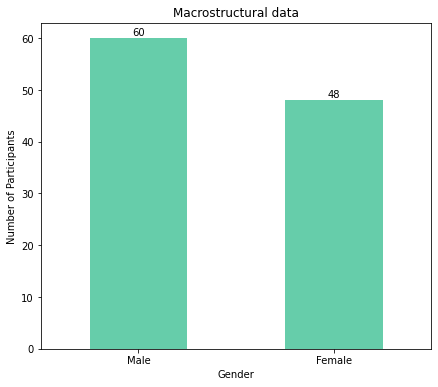

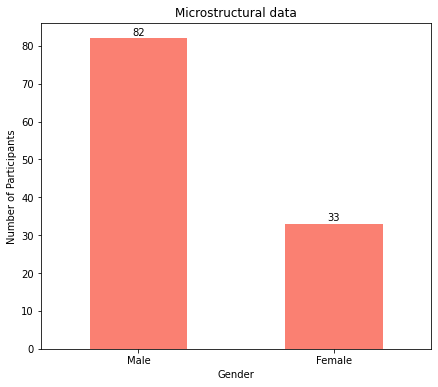

In [70]:
Gender_CT = demographic_CT['Sex'].value_counts()
plt.figure(figsize=(7, 6))

ax = Gender_CT.plot(kind='bar', rot=0, color="mediumaquamarine")
ax.set_title("Macrostructural data", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Participants')
ax.set_xticklabels(('Male', 'Female'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    

Gender_FA = demographic_FA['Sex'].value_counts()
plt.figure(figsize=(7, 6))
    
ax = Group_FA.plot(kind='bar', rot=0, color="salmon")
ax.set_title("Microstructural data", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Participants')
ax.set_xticklabels(('Male', 'Female'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

Again, as the plots show, there are more males than females for both **macrostructural** and **microstructural** data. 

#### 1.2.2 Age 

To get an inital idea of how the age distribution is for the **macrostructural** data, we can run the following command. Second, to have a look on how the ages differ within the groups, we can use raincloud plots.

In [71]:
#get age information
demographic_CT['Age'].describe()

count    108.000000
mean      31.231481
std       10.911373
min       18.000000
25%       22.000000
50%       29.000000
75%       38.250000
max       64.000000
Name: Age, dtype: float64

<span style="color:red">NOTE!</span> To be able to run the raincloud plots, ptitprince has to be installed. If you didn't install ptitprince yet, run the following cell and remove the #. 

In [72]:
#!pip install ptitprince

<AxesSubplot:title={'center':'Age Distribution in Control and Patient Group for Macrostructural Data'}, xlabel='Age', ylabel='Group'>

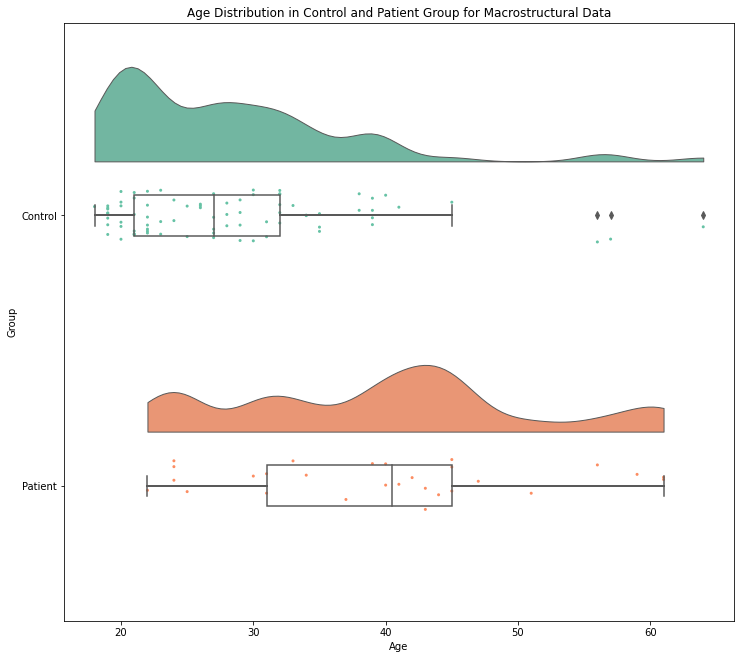

In [73]:
from ptitprince import PtitPrince as pt

f, ax = plt.subplots(figsize=(12, 11))
ax.set_title('Age Distribution in Control and Patient Group for Macrostructural Data')

pt.RainCloud(data = demographic_CT , x = "Group", y = "Age", ax = ax, orient='h')

Now, the same is done for the **microstructural** data. 

In [74]:
demographic_FA['Age'].describe()

count    115.000000
mean      36.043478
std       12.895934
min       19.000000
25%       25.000000
50%       34.000000
75%       43.000000
max       64.000000
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age Distribution in Control and Patient Group for Microstructural Data'}, xlabel='Age', ylabel='Group'>

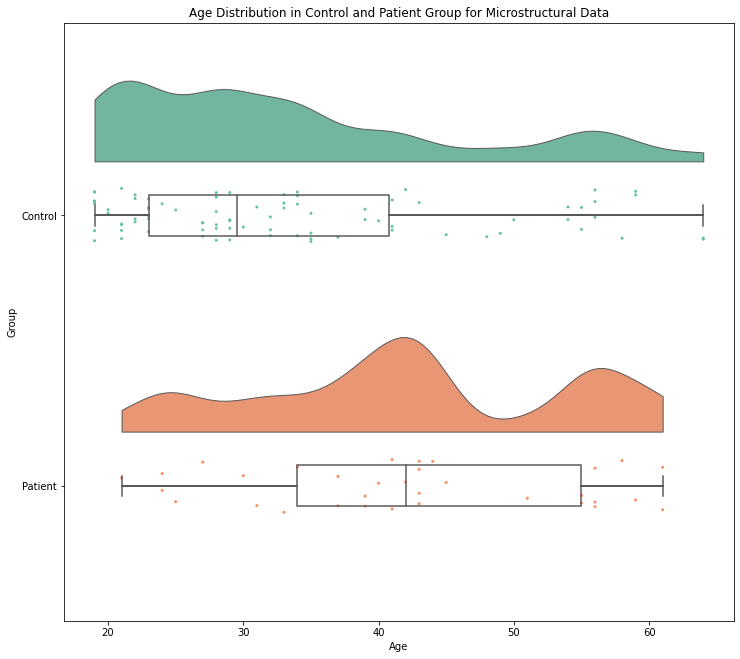

In [75]:
f, ax = plt.subplots(figsize=(12, 11))
ax.set_title('Age Distribution in Control and Patient Group for Microstructural Data')

pt.RainCloud(data = demographic_FA , x = "Group", y = "Age", ax = ax, orient='h')

As both plots show for both MRI metrics, the patient group involves participants that seem to be older in average 

# 2. Exploring the different MRI metrics

In the following chapter, the different MRI metrics are explored. Before getting a deeper look at the data, the derived form of the Desikan-Killiany Atlas with 308 cortical regions that is used for the **macro- and micro-structural data** is visualized.
There is a [github repository](https://github.com/RafaelRomeroGarcia/subParcellation) for that specific atlas with the required files therein. Since there is a poor documentation of the files and their content, it might be confusing which of them is actually required for visualization purposes. 

If you click on the repository link, the first folder with the title "500mm parcellation (308 regions)" is the relevant one. In the folder itself, there are two text files (.txt) with the coordinates and names of the 308 regions and the NIFTI file called "500.aparc_cortical_consecutive.nii". These are the files used for visualization. For that, I used the nibabel and nilearn modules. 

In [76]:
#import relevant modules

import nibabel as nb
from nilearn import plotting

In [77]:
#load NIFTI file

atlas_path = os.path.join(os.pardir,'data','500.aparc_cortical_consecutive.nii')

atlas = nb.load(atlas_path)

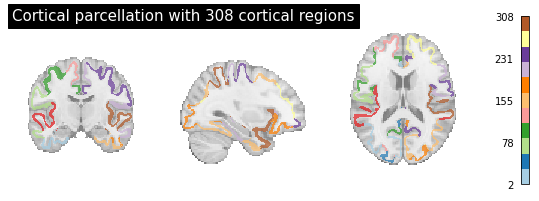

In [78]:
#plot atlas
plotting.plot_roi(atlas, draw_cross = False, annotate = False, colorbar=True, cmap='Paired', title="Cortical parcellation with 308 cortical regions")

There is also a.txt file with the title "308_regions_names.txt"  contains all the 308 cortical region names. In the following, the .txt file is read.

In [79]:
#read the .txt files with region names

with open('../data/308_regions_names.txt') as f:
    lines = f.readlines()

In [80]:
#region names
lines

['lh_bankssts_part1\n',
 'lh_bankssts_part2\n',
 'lh_caudalanteriorcingulate_part1\n',
 'lh_caudalmiddlefrontal_part1\n',
 'lh_caudalmiddlefrontal_part2\n',
 'lh_caudalmiddlefrontal_part3\n',
 'lh_caudalmiddlefrontal_part4\n',
 'lh_cuneus_part1\n',
 'lh_cuneus_part2\n',
 'lh_entorhinal_part1\n',
 'lh_fusiform_part1\n',
 'lh_fusiform_part2\n',
 'lh_fusiform_part3\n',
 'lh_fusiform_part4\n',
 'lh_fusiform_part5\n',
 'lh_inferiorparietal_part1\n',
 'lh_inferiorparietal_part2\n',
 'lh_inferiorparietal_part3\n',
 'lh_inferiorparietal_part4\n',
 'lh_inferiorparietal_part5\n',
 'lh_inferiorparietal_part6\n',
 'lh_inferiorparietal_part7\n',
 'lh_inferiorparietal_part8\n',
 'lh_inferiortemporal_part1\n',
 'lh_inferiortemporal_part2\n',
 'lh_inferiortemporal_part3\n',
 'lh_inferiortemporal_part4\n',
 'lh_inferiortemporal_part5\n',
 'lh_inferiortemporal_part6\n',
 'lh_isthmuscingulate_part1\n',
 'lh_isthmuscingulate_part2\n',
 'lh_lateraloccipital_part1\n',
 'lh_lateraloccipital_part2\n',
 'lh_la

In [81]:
#proving 308 regions 
len(lines)

308

As we can see above, the 308 cortical region names are displayed in a chronological order from 1 to 308 for both left and right hemisphere. Each of the regions mostly consists of several parts as the names indicate.
Now, having visualized the used atlas with its regions and according labels, we can explore our first MRI metric. 

## 2.1 Macro-structural data: cortical thickness (CT)

**Cortical thickness (CT)** is a measurement of the *width of gray matter* of the cerebral cortex, whereas *gray matter* marks the area from the pial surface to the internal surface (where *white matter* begins). It has been shown that **CT** correlates with the diagnosis and prognosis of several psychiatric and neurological conditions [(Tahedl, 2020)](https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-020-02317-9).

First, the **CT** dataframe is adjusted in a way that it only involves the different brain areas and the Group.

In [82]:
#adjust data frame

CT_Dublin_ad = CT_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)
CT_Dublin_ad

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,1,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,1,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,2,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,2,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,2,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,2,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,2,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


Again, we rename the numbers indicating whether a subject belongs to the patient or control group to "Control" and "Patient"

In [83]:
CT_Dublin_ad['Group'] = CT_Dublin_ad['Group'].replace([1,2],['Control', 'Patient'])

In the next step, the means for each brain region is grouped by "Control" and "Patient"

In [84]:
CT_means = CT_Dublin_ad.groupby(['Group']).mean()

CT_means

,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,lh_entorhinal_part1_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
Group,,,,,,,,,,,,,,,,,,,,,
Control,2.401038,2.373775,2.446513,2.578638,2.585075,2.295387,2.621975,1.837425,1.860138,3.277575,...,2.691400,2.599250,2.426575,2.539175,3.707100,2.419613,3.501175,2.693612,3.026488,3.112950
Patient,2.209143,2.197500,2.332000,2.361286,2.409857,2.116714,2.442500,1.738429,1.775964,3.128000,...,2.454321,2.413071,2.260607,2.255821,3.483464,2.255679,3.302893,2.521464,2.874179,2.923357


A first look already reveals that patients seem to have lower **CT** compared to controls. However, in the following the mean of the means of each region is computed for both groups to get an idea of how the overall **CT** differs.

In [85]:
CT_means_mean = CT_means.mean(axis=1)

CT_means_mean

Group
Control    2.419537
Patient    2.264815
dtype: float64

As the values indicate, the overall mean of the means for each reagion is higher for the control group than for the patients group. We can visualize this with a violin plot. However, before visualizing the difference for control and patients, it might be helpful to reshape the dataframe so that the columns indicate the respective groups and the rows each brain region.

In [86]:
#switch column and rows 

CT_means_T = CT_means.T
CT_means_T

Group,Control,Patient
lh_bankssts_part1_thickness,2.401038,2.209143
lh_bankssts_part2_thickness,2.373775,2.197500
lh_caudalanteriorcingulate_part1_thickness,2.446513,2.332000
lh_caudalmiddlefrontal_part1_thickness,2.578638,2.361286
lh_caudalmiddlefrontal_part2_thickness,2.585075,2.409857
...,...,...
rh_transversetemporal_part1_thickness,2.419613,2.255679
rh_insula_part1_thickness,3.501175,3.302893
rh_insula_part2_thickness,2.693612,2.521464
rh_insula_part3_thickness,3.026488,2.874179


Text(0.5, 1.0, 'Distribution of Cortical Thickness Means')

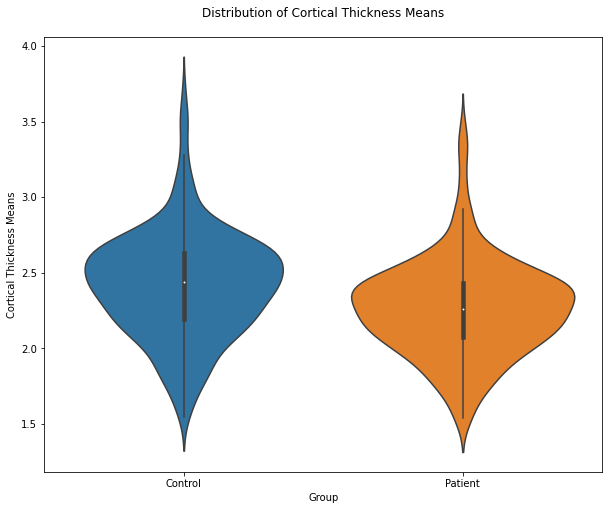

In [87]:
#plot mean of CT means

import seaborn as sb

plt.figure(figsize=(10,8))
ax = sb.violinplot(data=CT_means_T)
ax.set(xlabel='Group', ylabel='Cortical Thickness Means')
plt.title("Distribution of Cortical Thickness Means", pad = '20')

The violin plot reveals that the overall **CT** means in the patient group is lower compared to the controls. It might be interesting to know whether this accounts for all brain regions or whether there might be specific brain regions where the **CT** is higher for the patients since it isn't so clear at the bottom part of the violoin plots. So we can look for an effect in brain areas in a specific direction comparing both groups by computing the difference of the means for each brain region. A negative value would indicate a higher **CT** mean in patients in a specific brain area.

In [88]:
#compute difference

CT_means_T['Difference'] = CT_means_T.iloc[:,0] - CT_means_T.iloc[:,1]

CT_means_T

Group,Control,Patient,Difference
lh_bankssts_part1_thickness,2.401038,2.209143,0.191895
lh_bankssts_part2_thickness,2.373775,2.197500,0.176275
lh_caudalanteriorcingulate_part1_thickness,2.446513,2.332000,0.114513
lh_caudalmiddlefrontal_part1_thickness,2.578638,2.361286,0.217352
lh_caudalmiddlefrontal_part2_thickness,2.585075,2.409857,0.175218
...,...,...,...
rh_transversetemporal_part1_thickness,2.419613,2.255679,0.163934
rh_insula_part1_thickness,3.501175,3.302893,0.198282
rh_insula_part2_thickness,2.693612,2.521464,0.172148
rh_insula_part3_thickness,3.026488,2.874179,0.152309


Having computed the differences, we can use these values to plot a histogram to see how their distribution is. We can further specify to return a colored bin to show negative values. 

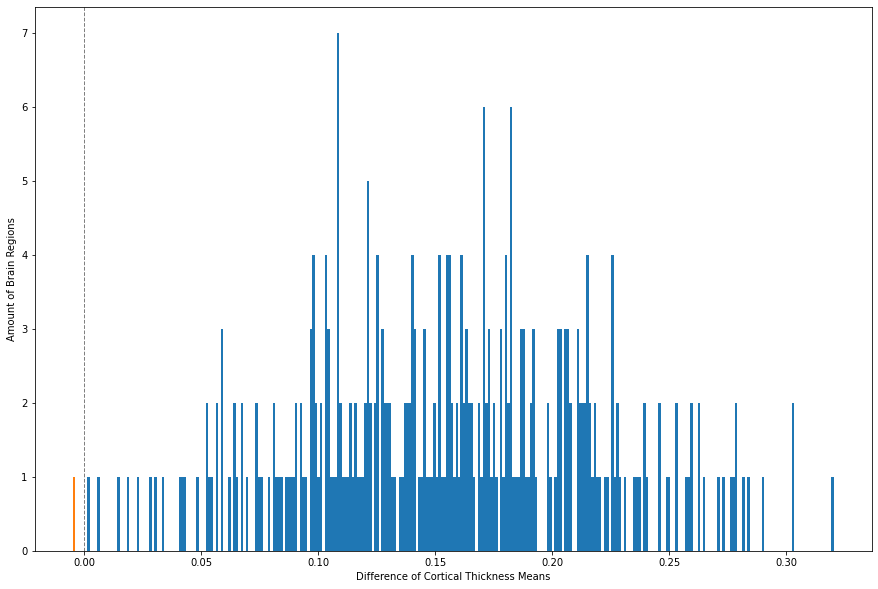

In [89]:
import numpy as np
import matplotlib.pyplot as plt

x = CT_means_T['Difference']

fig, ax = plt.subplots(figsize = (15, 10))

_, _, bars = plt.hist(CT_means_T['Difference'], bins = 308, color="C0")
for bar in bars:
    if bar.get_x() < 0:
        bar.set_facecolor("C1")
plt.xlabel("Difference of Cortical Thickness Means")
plt.ylabel("Amount of Brain Regions")
plt.axvline(x=0, linestyle='--',linewidth=1, color='grey')
plt.show()

As indicated by the orange bin, there is only one brain region for which the **CT** mean is higher in patients in comparison to controls. We can futher specify which brain region is at stake. 

In [90]:
CT_means_T.loc[CT_means_T['Difference'] < 0]

Group,Control,Patient,Difference
rh_precentral_part6_thickness,2.424338,2.429214,-0.004877


The brain region is just one out of nine parts of the precentral gyrus in the right hemisphere. Looking at the difference, it just seems very little. However, for the **macro-structural** data we can conclude that there is a loss of **CT** towards psychosis.

## 2.2 Micro-structural data: mean diffusivity (MD) and fractional anisotropy (FA)

In general, Diffusion MRI measures white matter fibres which makes it feasible to examine connections between different regions. For that, we look at how water diffuses in the brain which again provides information of the brain itself. The diffusion of water can be visualized as cloud if points which again can be approximated with a tensor model. Since there is a distinction in isotropic (characteristics are similar in all directions) vs anisotropic (characteristics e.g. faster in a given direction) diffusion, the tensor model might differ.

**MD** and **FA** are central characteristics of tensors. **MD** indicates how much diffusion there is inside a voxel. **FA** is a measurement of the anisotropy of diffusion with a value range between 0 and 1. While the a **FA** value of 0 stands for isotropic diffusion, the **FA** value of 1 indicates anisotropic diffusion.

In the following, the same procedure is done as for the **CT** data. First, we adjust the dataframes, compute the means and plot the differences between control and patients.

In [91]:
#adjust dataframes

MD_Dublin_ad = MD_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

FA_Dublin_ad = FA_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

Again, the numbers indicating the group are renamed with the respective label.

In [92]:
MD_Dublin_ad['Group'] = MD_Dublin_ad['Group'].replace([1,2],['Control', 'Patient'])

FA_Dublin_ad['Group'] = FA_Dublin_ad['Group'].replace([1,2],['Control', 'Patient'])

Now we can compute the mean for each brain region for controls and patients. 

In [93]:
MD_means = MD_Dublin_ad.groupby('Group').mean()
MD_means

,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,lh_entorhinal_part1_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
Group,,,,,,,,,,,,,,,,,,,,,
Control,0.886598,0.890146,0.873439,0.919476,0.858488,0.888854,0.943110,0.953671,0.960768,0.927415,...,0.913402,0.969293,0.976659,0.921305,1.074159,1.046293,1.073183,0.911683,0.914988,0.933293
Patient,0.920545,0.920939,0.906485,0.965030,0.879091,0.931667,0.997727,1.025030,1.003879,0.985485,...,0.939303,0.997000,1.017303,0.989152,1.248970,1.135364,1.206697,0.965242,0.981182,1.001848


Interestingly, we see that **MD** seems to be higher in patients than in controls. To get an idea of the overall **MD**, we compute the mean of the means of the brain regions for both groups.

In [94]:
#mean of means of mean diffusivity for control and patients

MD_means_mean = MD_means.mean(axis=1)
MD_means_mean

Group
Control    0.937044
Patient    0.974837
dtype: float64

The values indicate that the control group has a lower average mean diffusivity compared to patients.

Now, we will have a look at **FA**.

In [95]:
FA_means = FA_Dublin_ad.groupby('Group').mean()
FA_means

,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,lh_entorhinal_part1_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
Group,,,,,,,,,,,,,,,,,,,,,
Control,0.318866,0.157451,0.218463,0.157512,0.174805,0.147061,0.144451,0.135451,0.148573,0.213183,...,0.151720,0.137244,0.136427,0.223732,0.193293,0.135671,0.156598,0.155098,0.151024,0.143634
Patient,0.304939,0.157788,0.220758,0.156121,0.177636,0.147818,0.143879,0.124909,0.140182,0.212152,...,0.146455,0.134091,0.133909,0.230152,0.194030,0.141606,0.149121,0.158455,0.147667,0.142030


In [96]:
#mean of means of fractional anisotropy for control and patients

FA_means_mean = FA_means.mean(axis=1)
FA_means_mean

Group
Control    0.166799
Patient    0.164951
dtype: float64

The values indicate that the patient group has a lower mean fractional anisotropy compared to patients. To plot these means, again the columns and rows has to be switched.

In [104]:
#switch colums and rows

MD_means_T = MD_means.T
FA_means_T = FA_means.T

Text(0.5, 1.0, 'Distribution of Mean Diffusivity Means')

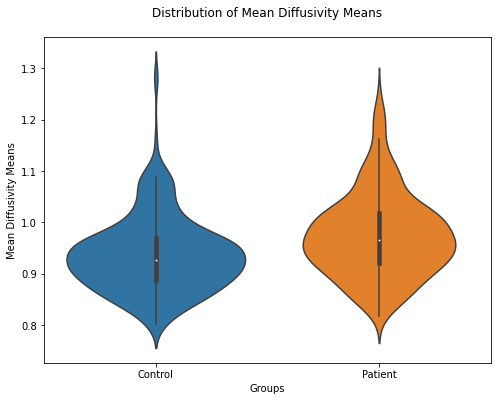

In [105]:
#plot the MD means

plt.figure(figsize=(8,6))
ax = sb.violinplot(data=MD_means.T)
ax.set(xlabel='Groups', ylabel='Mean Diffusivity Means')
plt.title("Distribution of Mean Diffusivity Means", pad = '20')

The violin plot also shows that the **MD** means for controls are lower. While the mean values for **FA** does not to seem to differ remarkably, they are also plotted for a better imagination.  

Text(0.5, 1.0, 'Distribution of Fractional Anisotropy Means')

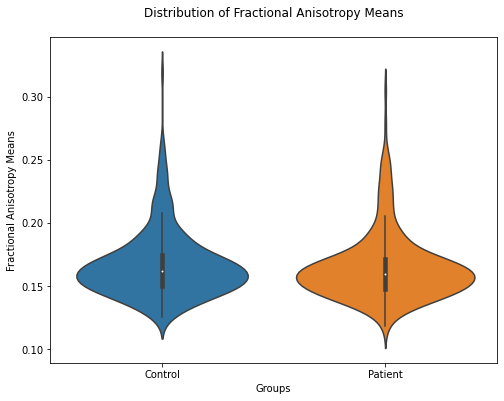

In [106]:
#plot the FA means

plt.figure(figsize=(8,6))
ax = sb.violinplot(data=FA_means.T)
ax.set(xlabel='Groups', ylabel='Fractional Anisotropy Means')
plt.title("Distribution of Fractional Anisotropy Means", pad = '20')

Coherently with the mean values, the **FA** means seem to be rather similar. 

Next, we will again look for whether all brain regions show an effect in the same direction as it was for **CT** the case. For that, the differences in the means of patient and control group is computed and their distribution plotted.

In [114]:
#compute difference

MD_means_T['Difference'] = MD_means_T.iloc[:,0] - MD_means_T.iloc[:,1]

MD_means_T

Group,Control,Patient,Difference
lh_bankssts_part1_thickness,0.886598,0.920545,-0.033948
lh_bankssts_part2_thickness,0.890146,0.920939,-0.030793
lh_caudalanteriorcingulate_part1_thickness,0.873439,0.906485,-0.033046
lh_caudalmiddlefrontal_part1_thickness,0.919476,0.965030,-0.045555
lh_caudalmiddlefrontal_part2_thickness,0.858488,0.879091,-0.020603
...,...,...,...
rh_transversetemporal_part1_thickness,1.046293,1.135364,-0.089071
rh_insula_part1_thickness,1.073183,1.206697,-0.133514
rh_insula_part2_thickness,0.911683,0.965242,-0.053559
rh_insula_part3_thickness,0.914988,0.981182,-0.066194


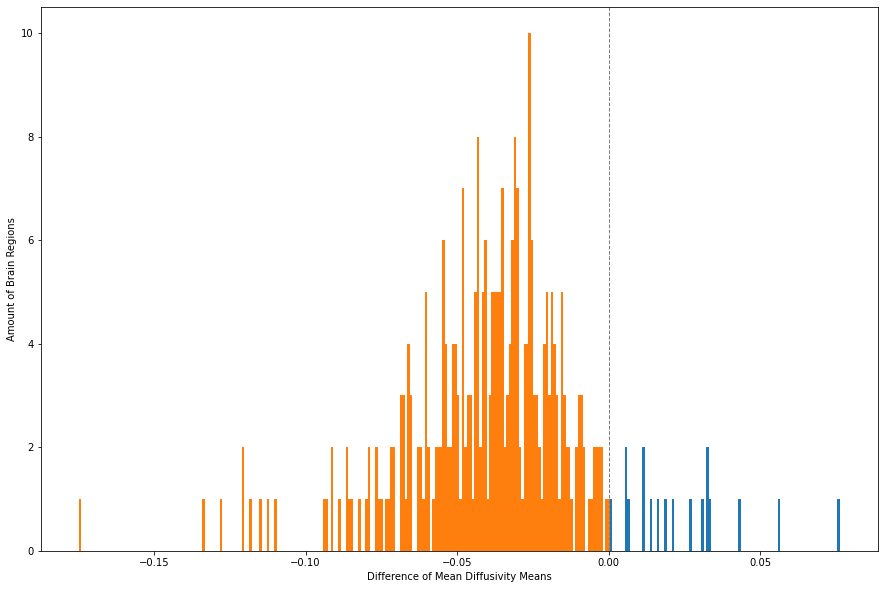

In [108]:
import numpy as np
import matplotlib.pyplot as plt

x_MD = MD_means_T['Difference']

fig, ax = plt.subplots(figsize = (15, 10))

_, _, bars = plt.hist(MD_means_T['Difference'], bins = 308, color="C0")
for bar in bars:
    if bar.get_x() < 0:
        bar.set_facecolor("C1")
plt.xlabel("Difference of Mean Diffusivity Means")
plt.ylabel("Amount of Brain Regions")
plt.axvline(x=0, linestyle='--',linewidth=1, color='grey')
plt.show()

As it can be seen, the majority of the brain regions show increased **MD** in patients. The brain regions that seem to be higher in **MD** in controls are the following:

In [113]:
print(MD_means_T.loc[MD_means_T['Difference']  > 0])

Group                                 Control   Patient  Difference
lh_inferiortemporal_part4_thickness  0.855829  0.854818    0.001011
lh_lateraloccipital_part5_thickness  1.087037  1.054606    0.032431
lh_lateraloccipital_part6_thickness  0.907402  0.888455    0.018948
lh_lateraloccipital_part8_thickness  0.925695  0.891939    0.033756
lh_lateraloccipital_part9_thickness  0.969159  0.938515    0.030643
lh_postcentral_part1_thickness       1.276159  1.220030    0.056128
lh_precentral_part5_thickness        0.986951  0.980424    0.006527
lh_precuneus_part2_thickness         1.048524  1.034576    0.013949
lh_superiorparietal_part1_thickness  0.999524  0.993727    0.005797
rh_lateraloccipital_part1_thickness  1.078963  1.046515    0.032448
rh_lateraloccipital_part5_thickness  0.926024  0.914970    0.011055
rh_lateraloccipital_part7_thickness  0.883988  0.878061    0.005927
rh_lateraloccipital_part8_thickness  0.972439  0.945788    0.026651
rh_lingual_part2_thickness           1.057695  1

Given the mean of  **FA** means, the distriubtion of their differences might be more ambigious. However, let's check this.

In [115]:
#compute difference

FA_means_T['Difference'] = FA_means_T.iloc[:,0] - FA_means_T.iloc[:,1]

FA_means_T

Group,Control,Patient,Difference
lh_bankssts_part1_thickness,0.318866,0.304939,0.013926
lh_bankssts_part2_thickness,0.157451,0.157788,-0.000337
lh_caudalanteriorcingulate_part1_thickness,0.218463,0.220758,-0.002294
lh_caudalmiddlefrontal_part1_thickness,0.157512,0.156121,0.001391
lh_caudalmiddlefrontal_part2_thickness,0.174805,0.177636,-0.002831
...,...,...,...
rh_transversetemporal_part1_thickness,0.135671,0.141606,-0.005935
rh_insula_part1_thickness,0.156598,0.149121,0.007476
rh_insula_part2_thickness,0.155098,0.158455,-0.003357
rh_insula_part3_thickness,0.151024,0.147667,0.003358


The "Difference" Column already shows mixed directions. To visualize that, we run the following code.

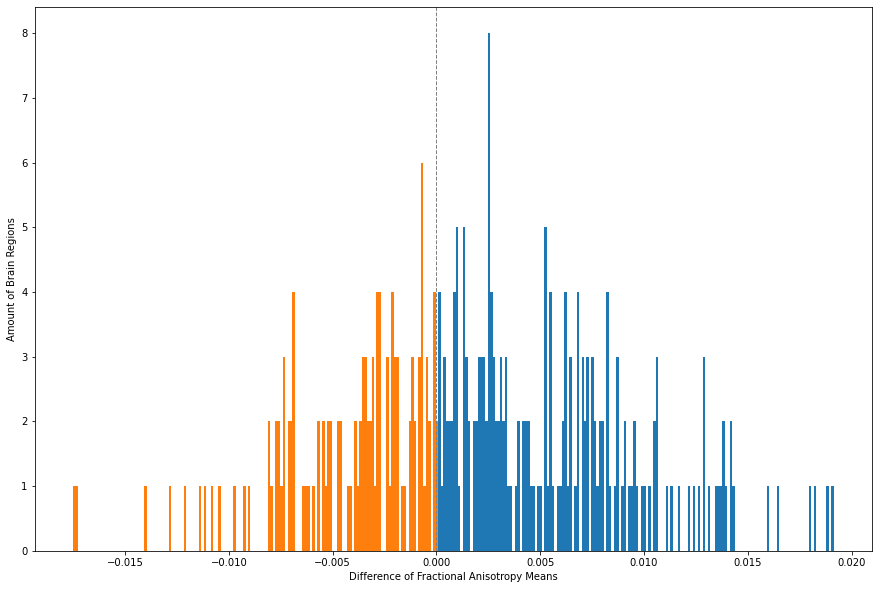

In [120]:
import numpy as np
import matplotlib.pyplot as plt

x_FA = FA_means_T['Difference']

fig, ax = plt.subplots(figsize = (15, 10))

_, _, bars = plt.hist(FA_means_T['Difference'], bins = 308, color="C0")
for bar in bars:
    if bar.get_x() < 0:
        bar.set_facecolor("C1")
plt.xlabel("Difference of Fractional Anisotropy Means")
plt.ylabel("Amount of Brain Regions")
plt.axvline(x=0, linestyle='--',linewidth=1, color='grey')
plt.show()

The distribution of the means here is not to clear as it was for **CT** and **MD** the case. Overall it can be said that the directions are mixed, however, what can be seen is that there is a little tendency of more decrease in **FA** for patients. The brain regions higher in **FA** for patients can be returned with the following code.

In [121]:
FA_means_T.loc[FA_means_T['Difference'] < 0]

Group,Control,Patient,Difference
lh_bankssts_part2_thickness,0.157451,0.157788,-0.000337
lh_caudalanteriorcingulate_part1_thickness,0.218463,0.220758,-0.002294
lh_caudalmiddlefrontal_part2_thickness,0.174805,0.177636,-0.002831
lh_caudalmiddlefrontal_part3_thickness,0.147061,0.147818,-0.000757
lh_fusiform_part2_thickness,0.234183,0.234909,-0.000726
...,...,...,...
rh_supramarginal_part4_thickness,0.131000,0.134455,-0.003455
rh_frontalpole_part1_thickness,0.223732,0.230152,-0.006420
rh_temporalpole_part1_thickness,0.193293,0.194030,-0.000738
rh_transversetemporal_part1_thickness,0.135671,0.141606,-0.005935


This was the data exploration section analyzing basic demographic variables and the distribution of differences in brain areas between controls and patients. The following pages deal with the application of machine learning algorithms to our data.